<a href="https://colab.research.google.com/github/timsainb/example_r_colab_project/blob/master/example_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# grabbed from https://www.kaggle.com/donyoe/exploring-ufo-sightings/data

### Install the requisite packages (if you haven't already)

In [2]:
list.of.packages <- c("maps", "mapdata", "data.table")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


### Load up our packages

In [3]:
library(data.table)
library(ggplot2)
library(lubridate)
library(maps)
library(mapdata)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date



###  Grab our data

In [6]:
url = "https://raw.githubusercontent.com/timsainb/example_r_colab_project/master/scrubbed.csv"
# check if the file is in the directory
if (!file.exists("scrubbed.csv")){
  print("Downloading data")
  download.file(url, "scrubbed.csv", "wget") 
}

[1] "Downloading data"


### Load our data

In [10]:
ufo <- fread("scrubbed.csv")
ufo$datetime <- mdy_hm(ufo$datetime) # Date format
ufo$`date posted` <- mdy(ufo$`date posted`)
ufo$`duration (seconds)` <- as.numeric(ufo$`duration (seconds)`)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [11]:
head(ufo, 3)

datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<dbl>
1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.8830556,-97.941111
1949-10-10 21:00:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.38421,-98.581082
1955-10-10 17:00:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.2,-2.916667


### WorldMap UFOs

Warning message:
“Removed 1 rows containing missing values (geom_point).”

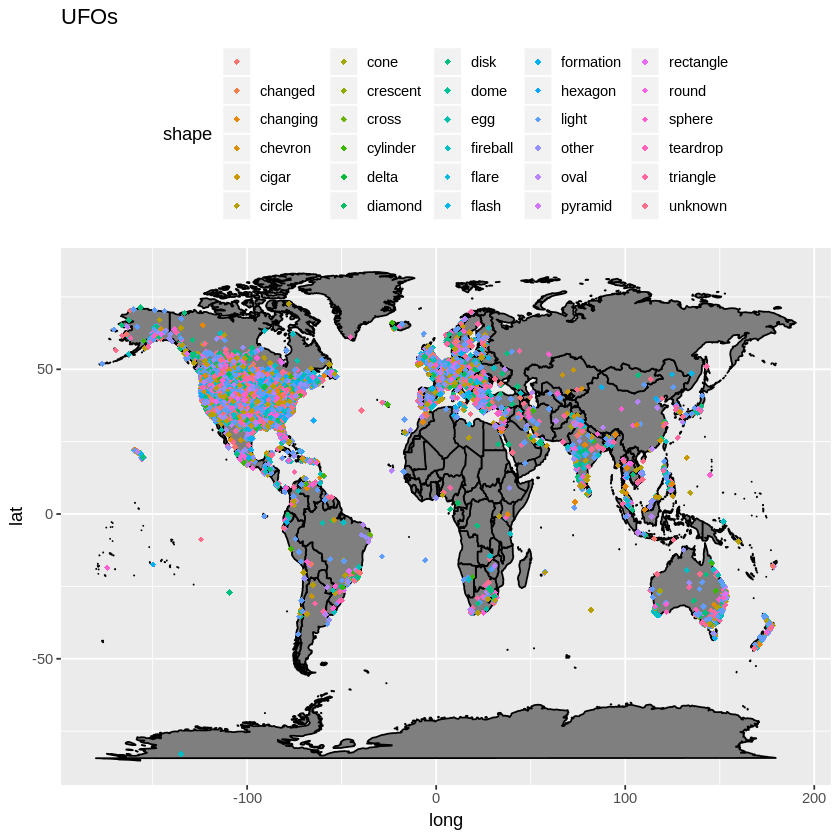

In [14]:
ufo$latitude <- as.numeric(ufo$latitude)


map <- borders("world", colour="black", fill="gray50") 
ufo_map <- ggplot(ufo) + map 
print(ufo_map + geom_point(aes(x=ufo$longitude, y=ufo$latitude,color=shape),shape=18) +
        theme(legend.position = "top")+
        ggtitle("UFOs"))

In [16]:
ggsave("ufocount.png", device="png", width = 5, height = 5, units = "in")

Warning message:
“Removed 1 rows containing missing values (geom_point).”

### UFOs by shape

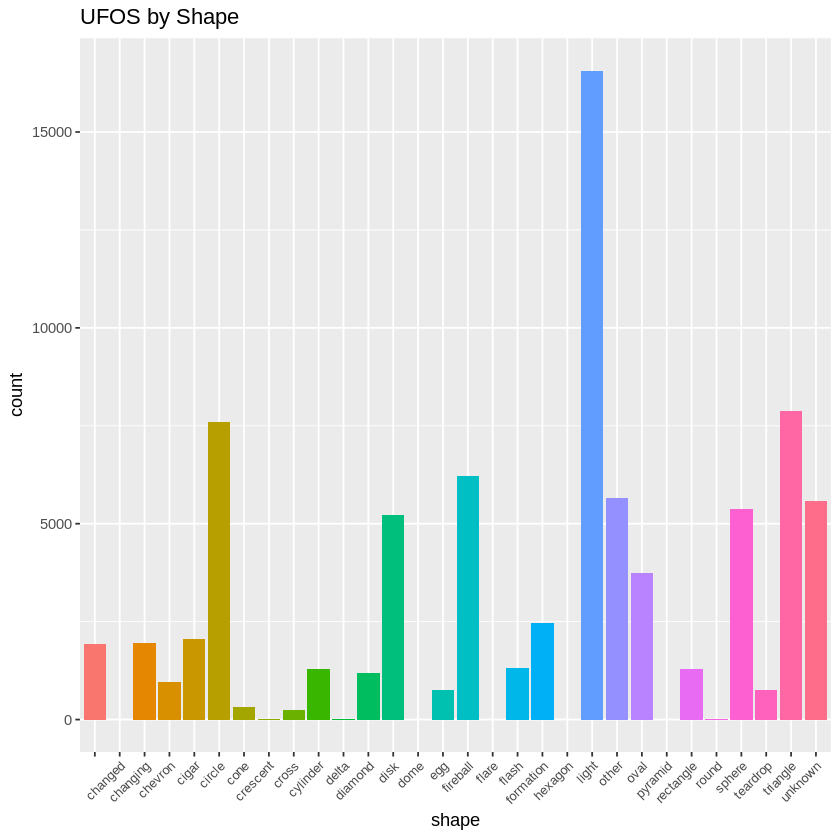

In [17]:
ggplot(ufo,aes(shape,fill=shape))+
  stat_count()+ggtitle("UFOS by Shape")+theme(legend.position="none")+
  theme(axis.text.x = element_text(angle = 45, size=8,hjust = 1))

In [0]:
ggsave("ufocount.png", device="png", width = 5, height = 5, units = "in")